<a href="https://colab.research.google.com/github/tavaresgani/portfolio-dados-e-ml/blob/main/housePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando o pandas
import pandas as pd

###Limpeza e visualização dos dados

In [2]:
#Importando o dataset de treino
base = pd.read_csv('/content/train.csv')

In [4]:
#Visualizando a base
base.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Verificando o shape
base.shape

(1460, 81)

In [6]:
#As informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
#Visualizando os valores vazios
base.isnull().sum()/base.shape[0]

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,0.177397
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [15]:
#Eliminando as colunas com mais de 10% de valores vazios
eliminar = base.columns[base.isnull().sum()/base.shape[0] > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [16]:
#Eliminando essas colunas
base = base.drop(eliminar, axis=1)

In [17]:
base.isnull().sum()/base.shape[0]

,0
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotArea,0.0
Street,0.0
...,...
MoSold,0.0
YrSold,0.0
SaleType,0.0
SaleCondition,0.0


In [21]:
#Selecionando apenas as colunas numéricas
colunas = base.columns[base.dtypes!= 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
#Criar uma nova base com esses valores numericos apenas
base2 = base.loc[:, colunas]
base2.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [25]:
#Verificando os valores vazios
base2.isnull().sum().sort_values(ascending=False)

,0
GarageYrBlt,81
MasVnrArea,8
Id,0
OpenPorchSF,0
KitchenAbvGr,0
TotRmsAbvGrd,0
Fireplaces,0
GarageCars,0
GarageArea,0
WoodDeckSF,0


In [26]:
#Substituindo os valores vazios por -1
base2 = base2.fillna(-1)

###Criando o modelo

In [27]:
#Selecionando X e y
X = base2.drop('SalePrice', axis=1)
y = base2.SalePrice

In [28]:
#Importando o train_test_split
from sklearn.model_selection import train_test_split

In [29]:
#Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
#Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [31]:
#Criando a regressão lienar e fazendo o fit com os dados de treino
reg_rl = LinearRegression()
reg_rl.fit(X_train, y_train)

LinearRegression()

In [32]:
#Fazendo a previsão dos dados de teste
y_rl = reg_rl.predict(X_test)

In [33]:
#Importando a arvore de regressão
from sklearn.tree import DecisionTreeRegressor

In [35]:
#Criando a regressão e fazendo fit com os dados de treino
reg_ar = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [36]:
#Fazendo a previsão
y_ar = reg_ar.predict(X_test)

In [37]:
#Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [38]:
#Criando o regressor e fazendo fit om os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [39]:
#Fazendo a previsão
y_knn = reg_knn.predict(X_test)

In [40]:
#Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [41]:
#Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [42]:
#avaliando o erro da regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

22764.026236544112
1197736462.2396336


In [43]:
#Erro da arvore de decisão
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27420.577625570775
1753168141.2123287


In [44]:
# e do knn
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

32618.238584474886
2489885345.465183


In [45]:
#Importando matplotlib
import matplotlib.pyplot as plt

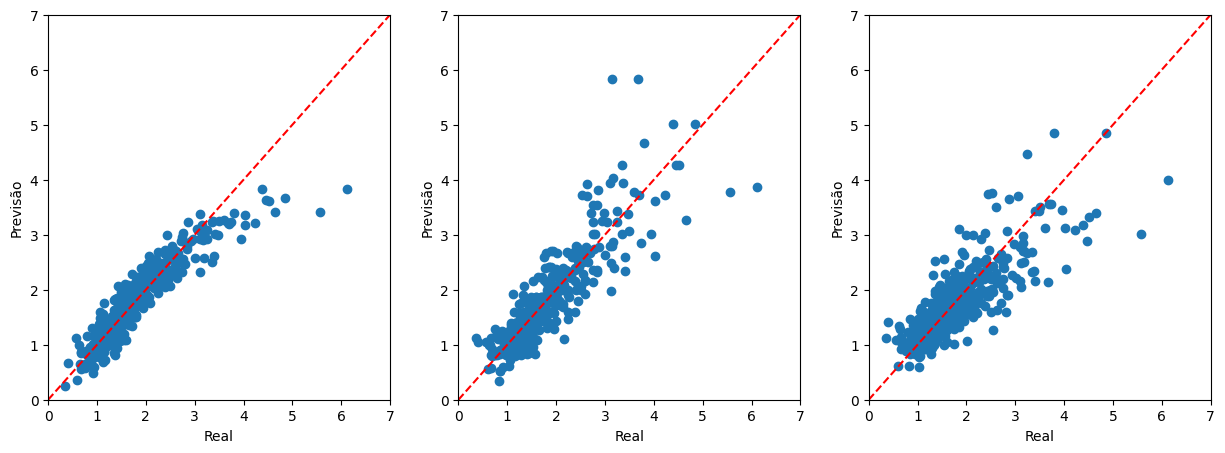

In [47]:
#Criando o gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_rl/100000)
ax[0].plot([0,700000], [0,700000], '--r')

ax[1].scatter(y_test/100000, y_ar/100000)
ax[1].plot([0,700000], [0,700000], '--r')


ax[2].scatter(y_test/100000, y_knn/100000)
ax[2].plot([0,700000], [0,700000], '--r')

ax[0].set(xlim=(0,7), ylim=(0,7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')

ax[1].set(xlim=(0,7), ylim=(0,7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')

ax[2].set(xlim=(0,7), ylim=(0,7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()




###Base de teste do kaggle

In [49]:
#Importando a base de teste
teste = pd.read_csv('/content/test.csv')

In [50]:
#Visualizando a base
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [52]:
#eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [56]:
#Verificando as colunas numericas
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [57]:
#Matendo também apenas as colunas numericas
teste = teste.loc[:, colunas2]

In [58]:
#Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [59]:
#Visualizando a quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False)

,0
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
BsmtUnfSF,1
GarageCars,1
GarageArea,1
BsmtFinSF1,1
BsmtFinSF2,1
TotalBsmtSF,1


In [60]:
#Substituir os valores vazios por -1
teste = teste.fillna(-1)

In [62]:
#Usando regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [63]:
#Adc essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [64]:
#Extrair somente o Id e o SalePrice
resultado = teste[['Id', 'SalePrice']]

In [65]:
#Exportando a base
resultado.to_csv('resultado.csv', index=False)